In [2]:
import regex as re
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
### test tego, co nie działa

mytext = "Ustawa, ustawie z dnia do ustawy z dnia bez ustawy, oprócz ustaw, wyrok z dnia a nie ustawę z dnia ustawo z dnia o zmianie ustawy."

pattern1 = re.compile(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W?\s?', re.IGNORECASE)
pattern2 = re.compile(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W?\s?(?=\sz\sdnia)\w?', re.IGNORECASE)
pattern3 = re.compile(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W\s?(?!z\s*dnia\s*)', re.IGNORECASE)
pattern4 = re.compile(r'(?<!o zmianie)\D?\W?\s?(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W\s?', re.IGNORECASE)

match1 = pattern1.findall(mytext)
match2 = pattern2.findall(mytext)
match3 = pattern3.findall(mytext)
match4 = pattern4.findall(mytext)

print(match1)
print(match2)
print(match3)
print(match4)

['Ustawa', 'ustawie', 'ustawy', 'ustawy', 'ustaw', 'ustawę', 'ustawo', 'ustawy']
['ustawie', 'ustawy', 'ustawę', 'ustawo']
['Ustawa', 'ustawy', 'ustaw', 'ustawy']
['Ustawa', 'ustawie', 'ustawy', 'ustawy', 'ustaw', 'ustawę', 'ustawo', 'ustawy']


In [14]:
# tworzymy miejsce na pożądane informacje: słowniki z latami jako kluczami i liczbą akcji jako wartościami
adding = dict()
removing = dict()
changing = dict()
billWordsNum = dict()
billZDnia = dict()
billNotZDnia = dict()
billNotOZmianie = dict()


In [11]:
# regexowe wzorce, które pozwolą nam znaleźć odpowiedzi:
checkPattern = re.compile(r'\w*(?= się )') # wzór do sprawdzania wystąpień różnych akcji ustawodawcy
addingPattern = re.compile(r'(?<=dodaje się )(§|ust|art|pkt|Rozdział|rozdział|nowe|nowy|^\s)')
removingPattern = re.compile(r'(Uchyla|uchyla|Znosi|znosi|skreśla|likwiduje|przedawniają)\s?\D?się\s?\D?(§|ust|art|pkt|Rozdział|rozdział|nowe|nowy|^\s)')
changingPattern = re.compile(r'(Przedłuża|przedłuża|zamienia|zastępuje|zmienia|Ogłasza|ogłasza)\s?\D?się\s?\D?(§|ust|art|pkt|Rozdział|rozdział|nowe|nowy|^\s)')

billNumPattern = re.compile(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W\s?', re.IGNORECASE)
zDniaPattern = re.compile(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W\s?(?=\s*z\s*dnia)', re.IGNORECASE)
notZDniaPattern = re.compile(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W\s?(?!\s*z\s*dnia)', re.IGNORECASE)

notOZmianiePattern = re.compile(r'(?<!o zmianie)\D?\W?\s?(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\D?\W\s?', re.IGNORECASE)

In [5]:
# funkcja zmiany daty ustawy

def findYear(billText, filename):
    pattern = re.compile(r'(?<=Dz.U. z ).{4}')
    match = re.search(pattern, billText)
    global errors
    try:
        return match.group()

    except AttributeError:
        try:
            match = re.search(r'(?<=(billText)\D\s*z\D?\sdnia\s\d\d?\s?\w*\s?)\d{4}', billText, re.IGNORECASE)
            return match.group()
            
        except AttributeError:
            try:
                pattern = re.compile(r'(?<=U S T A W A\D\s*z\sdnia\s\d\d?\s?\w*\s?)\d{4}')
                match = pattern.search(billText)
                return match.group()

            except AttributeError:
                try:
                    match = re.search(r'\d{4}', billText)
                    return match.group()

                except AttributeError:
                    return None

In [5]:
# # funkcja do liczenia wystąpień słowa ustawa oraz jego odmian
# def findBillCount(file_path):
#     with open(file_path, 'r', encoding='utf-8') as f:
#         output = f.read()

#         countMatch = re.findall(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)\s*\w?', output, re.IGNORECASE)
#         return len(countMatch)

In [6]:
# # funkcja do liczenia wystąpień słowa ustawa oraz jego odmian po wyrażeniu "z dnia"
# def findBillZDnia(file_path):
#     with open(file_path, 'r', encoding='utf-8') as f:
#         output = f.read()

#         countMatch = re.findall(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)(?=\sz\sdnia)\w?', output, re.IGNORECASE)
#         return len(countMatch)

In [7]:
# # funkcja do liczenia wystąpień słowa ustawa oraz jego odmian nie występujących po wyrażeniu "z dnia"
# def findBillNotZDnia(file_path):
#     with open(file_path, 'r', encoding='utf-8') as f:
#         output = f.read()

#         countMatch = re.findall(r'(U S T A W A|ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)(?!\s*z\s*dnia\s*)', output, re.IGNORECASE)
#         return len(countMatch)

In [6]:
# funkcje zliczające ustawy:

# funkcja do liczenia wystąpień słowa ustawa oraz jego odmian
def findBillCount(file_path):

    countMatch = re.findall(billNumPattern, file_path)
    return len(countMatch)

# funkcja do liczenia wystąpień słowa ustawa oraz jego odmian po wyrażeniu "z dnia"
def findBillZDnia(file_path):

    countMatch = re.findall(zDniaPattern, file_path)
    return len(countMatch)

# funkcja do liczenia wystąpień słowa ustawa oraz jego odmian nie występujących po wyrażeniu "z dnia"
def findBillNotZDnia(file_path):

    countMatch = re.findall(notZDniaPattern, file_path)
    return len(countMatch)

def findBillNotOZmianie(file_path):

    countMatch = re.findall(notOZmianiePattern, file_path)
    return len(countMatch)

In [9]:
###### komórka testowa (ważne by uruchomić jedną komórkę poniżej - tę która zmienia ścieżkę!!!) ######
filename = f"{path}\{'2004_2703.txt'}"
processText(filename)
print(findBillCount(filename))
print(findBillZDnia(filename))
print(findBillNotZDnia(filename))

NameError: name 'path' is not defined

In [7]:
# funkcja do czytania i analizowania plików tekstowych. Można powiedzieć, że to jądro programu
def processText(file_path):
    global adding
    global removing
    global changing
    global billWordsNum
    global billZDnia
    global billNotZDnia
    global billNotOZmianie
    
    global allChanges

    with open(file_path, 'r', encoding='utf-8') as f:
        output = f.read()
        # print("Proper year: ", findYear(output, file_path))
        # addMatch = re.findall(addingPattern, output)
        properYear = findYear(output, file_path)

        if properYear != None and len(properYear) == 4:
            # liczenie dodań:
            if properYear not in adding.keys():
                adding[properYear] = 0
                adding[properYear] += len(re.findall(addingPattern, output))
            else:
                adding[properYear] += len(re.findall(addingPattern, output))

            # liczenie usuwań:
            if properYear not in removing.keys():
                removing[properYear] = 0
                removing[properYear] += len(re.findall(removingPattern, output))
            else:
                removing[properYear] += len(re.findall(removingPattern, output))

            # liczenie zmian:
            if properYear not in changing.keys():
                changing[properYear] = 0
                changing[properYear] += len(re.findall(changingPattern, output))
            else:
                changing[properYear] += len(re.findall(changingPattern, output))


            # liczenie wystąpień słowa ustawa:

            if properYear not in billWordsNum.keys():
                billWordsNum[properYear] = 0
                billWordsNum[properYear] += findBillCount(output)
            else:
                billWordsNum[properYear] += findBillCount(output)

            if properYear not in billZDnia.keys():
                billZDnia[properYear] = 0
                billZDnia[properYear] += findBillZDnia(output)
            else:
                billZDnia[properYear] += findBillZDnia(output)

            if properYear not in billNotZDnia.keys():
                billNotZDnia[properYear] = 0
                billNotZDnia[properYear] += findBillNotZDnia(output)
            else:
                billNotZDnia[properYear] += findBillNotZDnia(output)
            
            if properYear not in billNotOZmianie.keys():
                billNotOZmianie[properYear] = 0
                billNotOZmianie[properYear] += findBillNotOZmianie(output)
            else:
                billNotOZmianie[properYear] += findBillNotOZmianie(output)

        # changeMatch = re.findall(changingPattern, output)
        # print(removeMatch)
        return None

        

In [8]:
# zmiana ścieżki do plików
path = r'C:\Users\marti\Desktop\Studia WIET\Semestr zimowy 2022-23\NLP\LabyNLP\ustawy'
os.chdir(path)

In [15]:
# załadowanie plików tekstowych (komórka 'main()')
path = r'C:\Users\marti\Desktop\Studia WIET\Semestr zimowy 2022-23\NLP\LabyNLP\ustawy'
os.chdir(path)

for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"

        processText(file_path)

# print(adding)
# print(removing)
# print(changing)
# print(billWordsNum)
# print(billZDnia)
# print(billNotZDnia)
print('DONE!')

DONE!


In [16]:
# sprawdzenie czy zgadzają się liczby ustaw

allbills = 0
zdnia = 0
notzdnia = 0
notozmianie = 0
for val in billWordsNum.values():
    allbills += val
for val in billZDnia.values():
    zdnia += val
for val in billNotZDnia.values():
    notzdnia += val
for val in billNotOZmianie.values():
    notozmianie += val

print("Wszystkie ustawy: ", allbills, "\nUstawy ze 'z dnia': ", zdnia, "\nUstawy bez 'z dnia': ", notzdnia)
print("Suma ustaw ze 'z dnia' i bez 'z dnia': ", zdnia + notzdnia)
print("Ustawy bez 'o zmianie'", notozmianie)

Wszystkie ustawy:  25079 
Ustawy ze 'z dnia':  8732 
Ustawy bez 'z dnia':  16347
Suma ustaw ze 'z dnia' i bez 'z dnia':  25079
Ustawy bez 'o zmianie' 25079


In [55]:
# funkcja plotująca
def plotBarplot(dictionary):
    keys = list(dictionary.keys())
    
    # mała gimnastyka w celu posortowania słownika:
    keysInt = []
    for key in keys:
        keysInt.append(int(key))
    keysInt.sort()
    keys = []
    for key in keysInt:
        keys.append(str(key))

    
    vals = [dictionary[k] for k in keys]
    allVals = sum(vals)


    plt.figure(figsize=(16, 16))
    ax = sns.barplot(x=keys, y=vals)
    ax.set(xlabel="Year", ylabel="Number of Changes")
    sns.set_style("darkgrid")

    # pokazywanie procentów:
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/allVals)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

    plt.show()

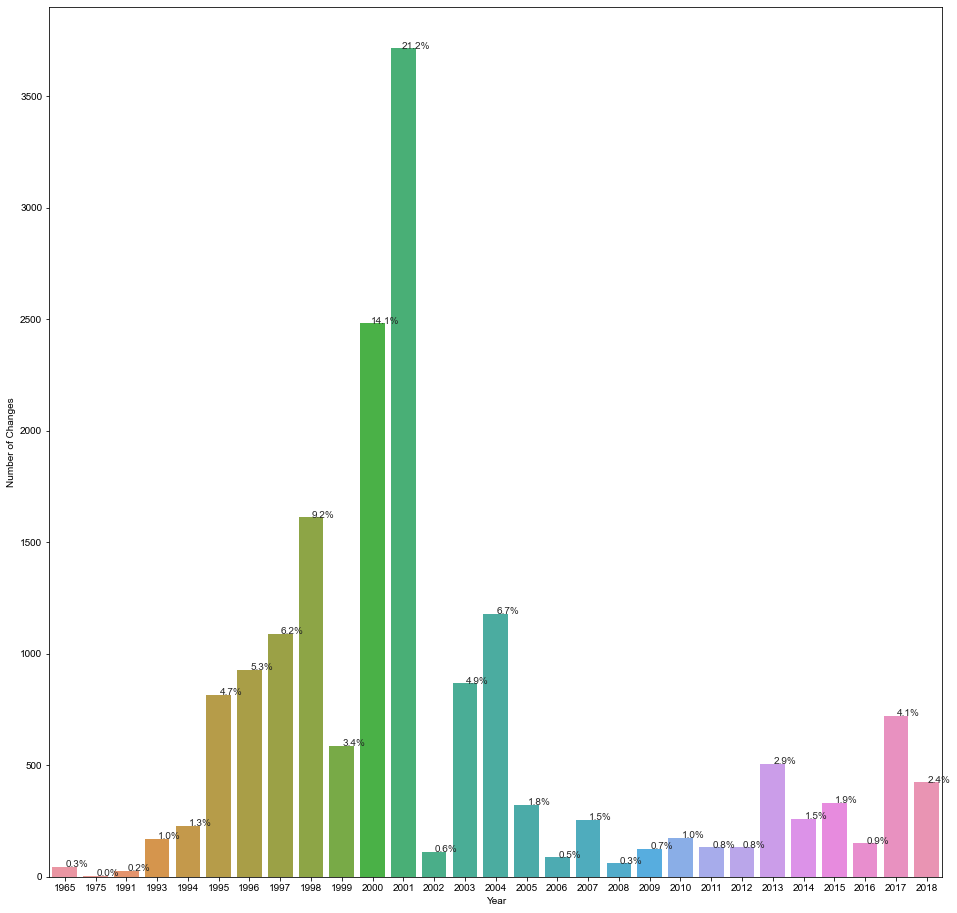

In [56]:
# wykres dodań:

plotBarplot(adding)

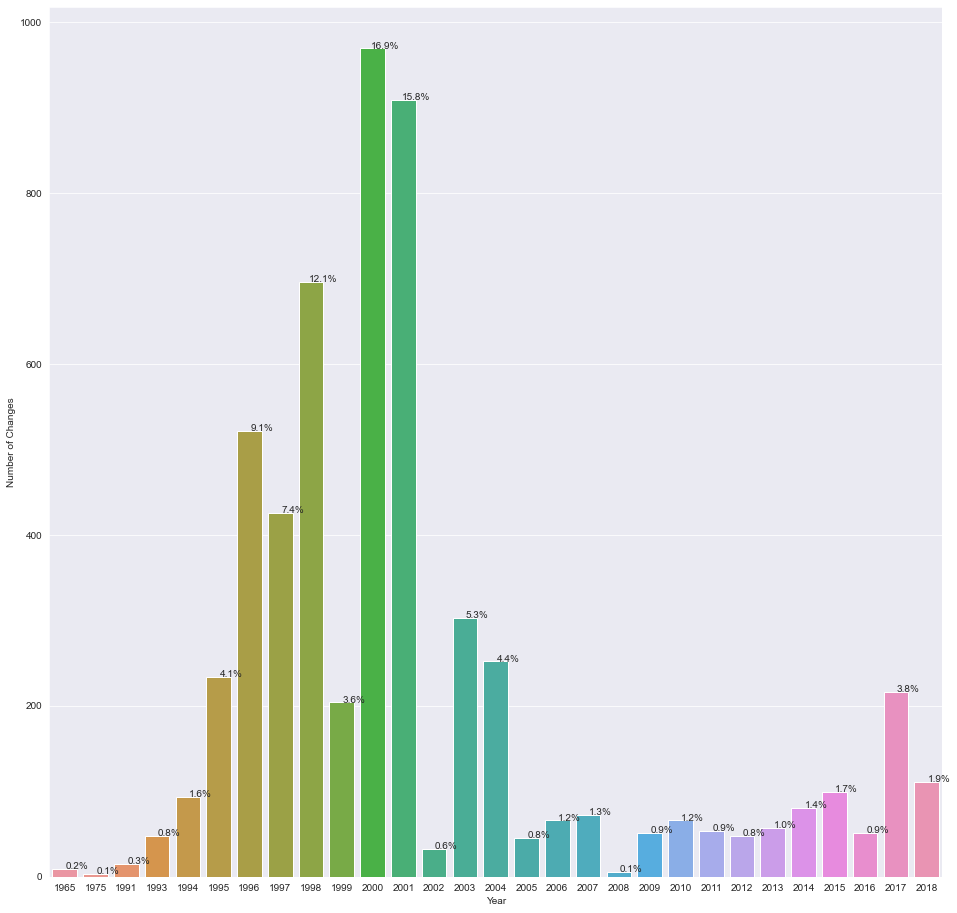

In [57]:
# wykres usunięć:

plotBarplot(removing)

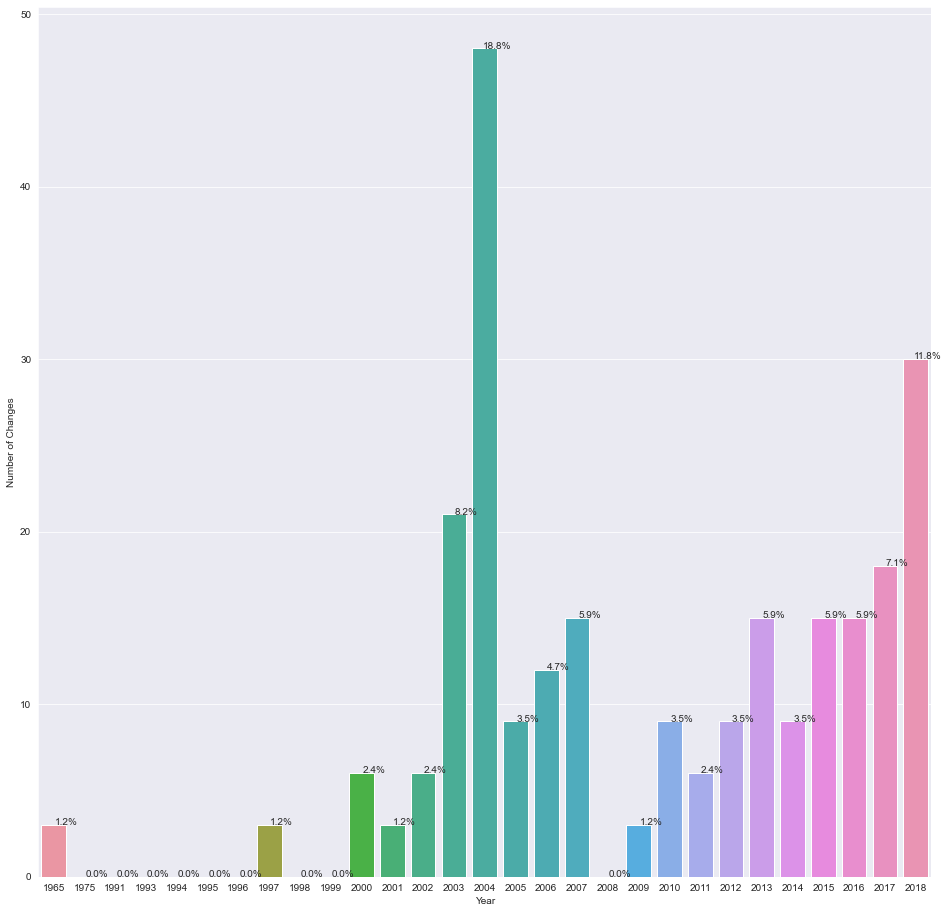

In [58]:
# wykres zmian:

plotBarplot(changing)

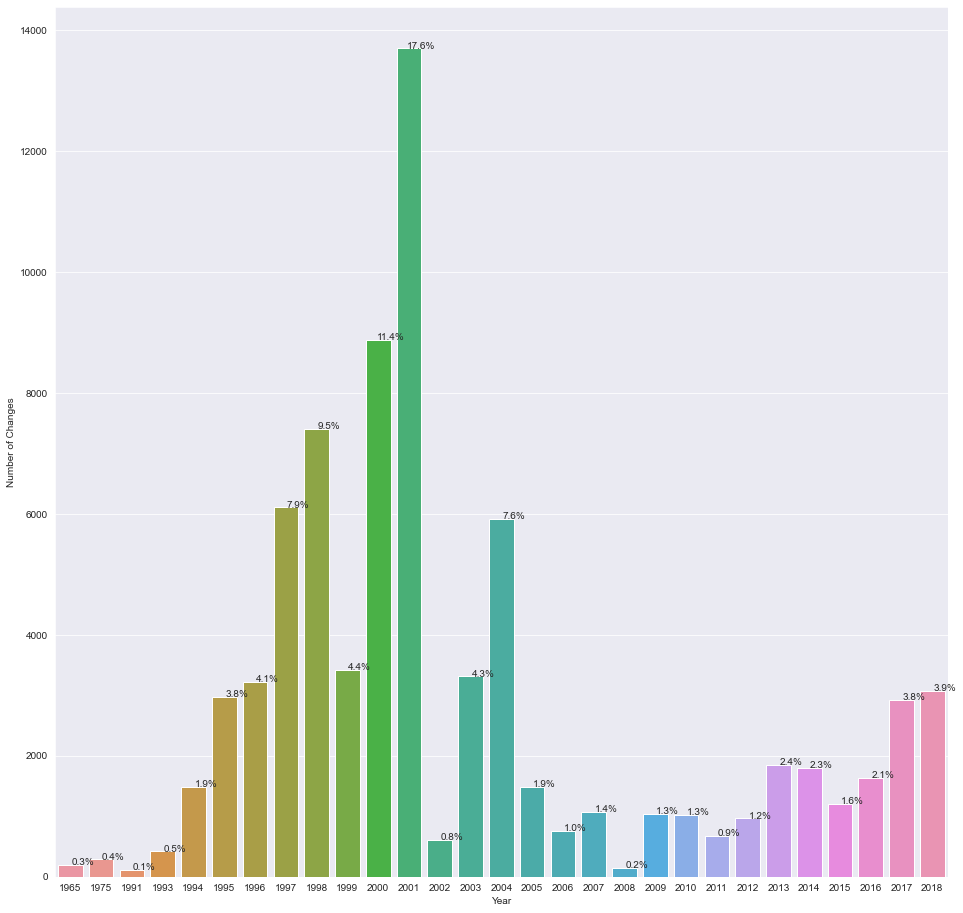

In [59]:
# wykres ustaw:

plotBarplot(billWordsNum)

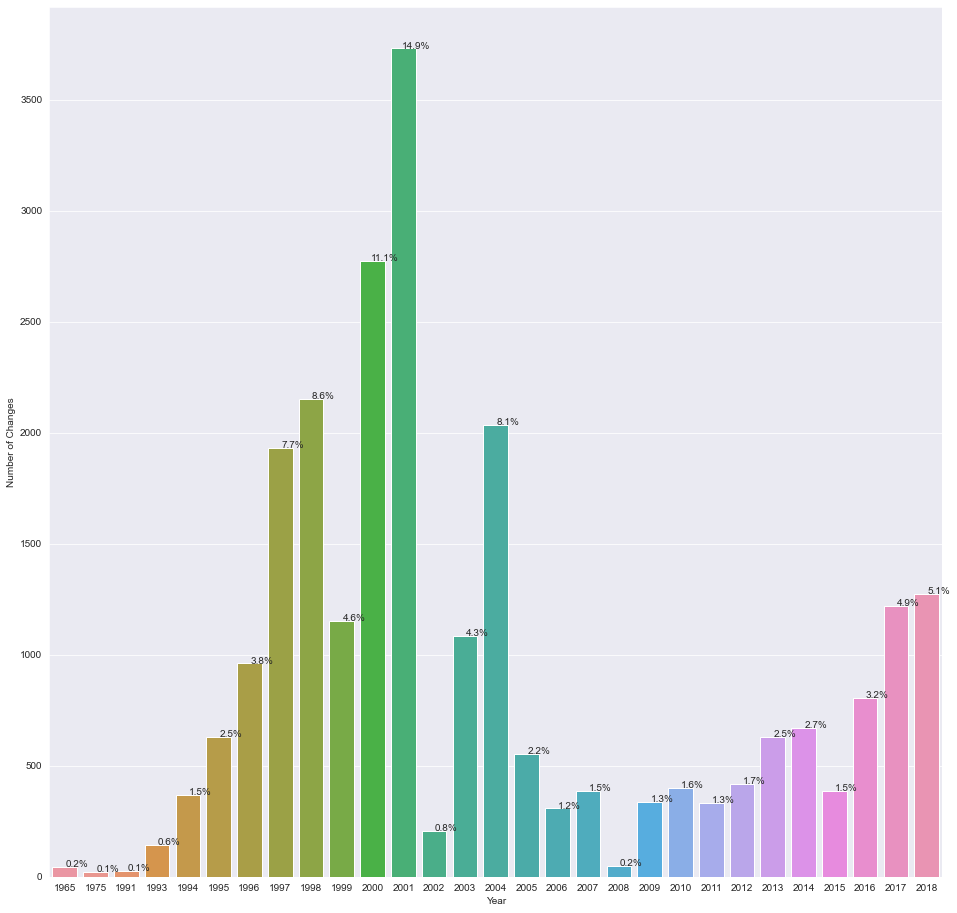

In [60]:
# wykres ustawa z dnia:

plotBarplot(billZDnia)

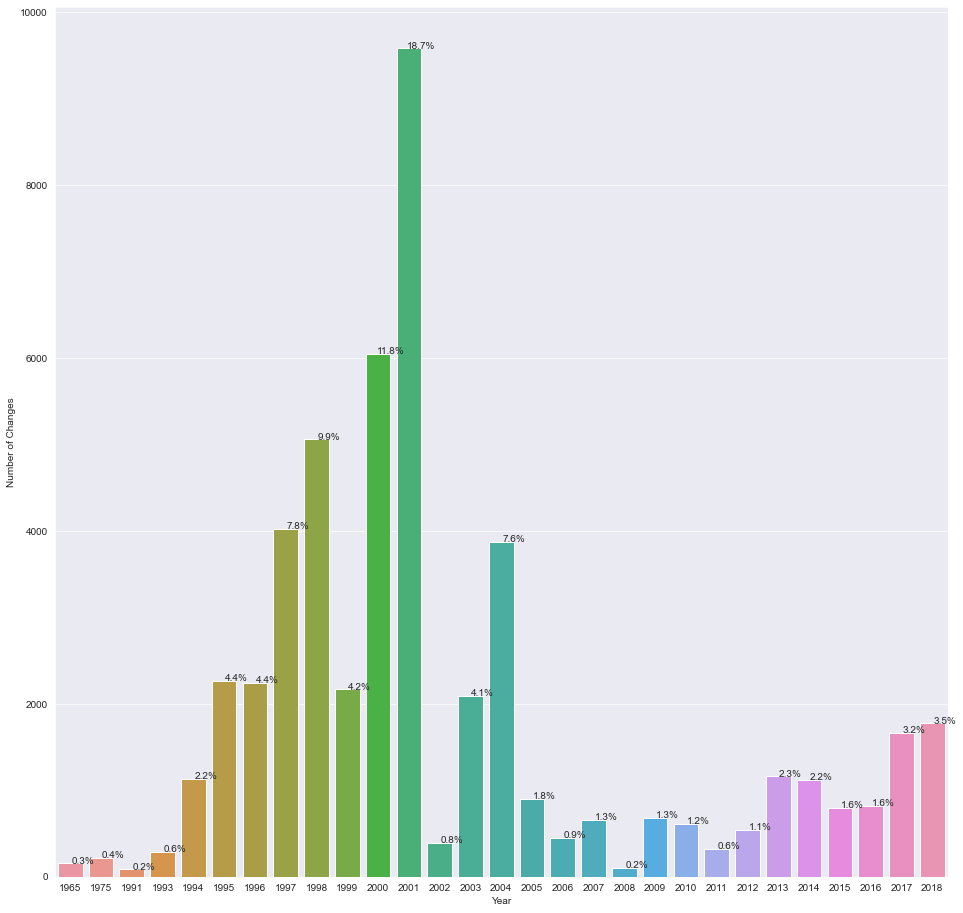

In [61]:
# wykres ustawa bez z dnia

plotBarplot(billNotZDnia)

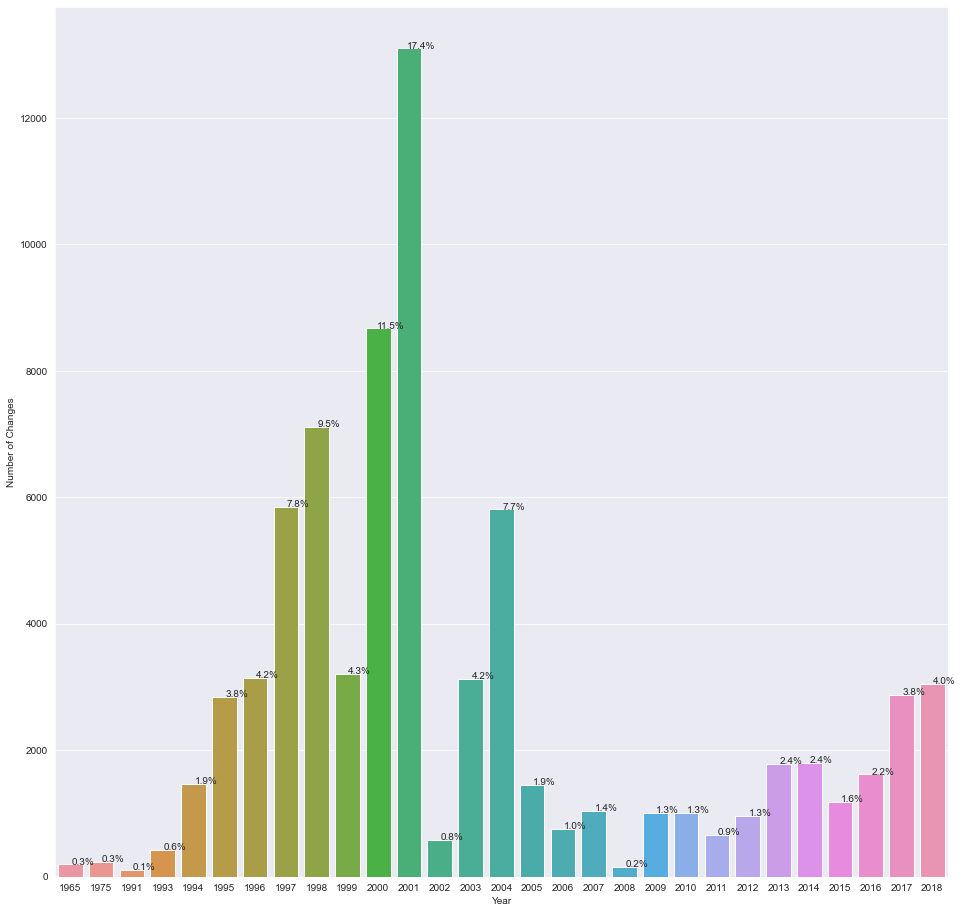

In [62]:
# wykres ustawa bez poprzedzającego "o zmianie"

plotBarplot(billNotOZmianie)